In [1]:
import pandas as pd
import numpy as np
import os
import pickle

In [4]:
pdf_movies = pd.read_csv('./Top_10000_Movies_2.csv')

In [53]:
# select particular columns
pdf_movies_2 = pdf_movies[["id","original_language","original_title","popularity","vote_average"]]
min_pass_len=16
max_pass_len = 24
speclchar_num_len = 5
pdf_movies_2['title_len'] = pdf_movies_2["original_title"].str.len()
pdf_movies_3 = pdf_movies_2[(pdf_movies_2['title_len'].between(10, max_pass_len-speclchar_num_len)) &
                            (pdf_movies_2["original_title"].str.contains('[A-Za-z]', na=False)) &
                            (pdf_movies_2["original_title"].str.isalpha() == True)]
pdf_movies_3.dropna(inplace=True)                      

<ipython-input-53-92831573d2da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_movies_2['title_len'] = pdf_movies_2["original_title"].str.len()
<ipython-input-53-92831573d2da>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_movies_3.dropna(inplace=True)


In [54]:
pdf_movies_3.head(20)

,id,original_language,original_title,popularity,vote_average,title_len
33,760195.0,en,Separation,557.939,6.0,10.0
84,741636.0,en,Bloodthirsty,334.459,6.6,12.0
127,739990.0,en,Nightbooks,227.322,6.6,10.0
225,809968.0,pl,Bartkowiak,151.004,6.3,10.0
245,607259.0,en,Fatherhood,140.428,7.7,10.0
295,860425.0,es,Sinaliento,123.674,5.9,10.0
316,157336.0,en,Interstellar,116.046,8.4,12.0
339,70981.0,en,Prometheus,109.482,6.5,10.0
343,793723.0,fr,Sentinelle,114.789,5.9,10.0
345,593910.0,en,Cinderella,109.329,6.7,10.0


In [39]:
pdf_movies_3.describe(include="all")

,id,original_language,original_title,popularity,vote_average,title_len
count,283.000000,283,283,283.000000,283.000000,283.000000
unique,NaN,16,273,NaN,NaN,NaN
top,NaN,en,Cinderella,NaN,NaN,NaN
freq,NaN,236,3,NaN,NaN,NaN
mean,234399.077739,NaN,NaN,31.474947,6.354417,10.791519
std,259367.416270,NaN,NaN,45.827379,1.229314,1.121517
min,19.000000,NaN,NaN,7.023000,0.000000,10.000000
25%,11053.000000,NaN,NaN,11.731500,5.900000,10.000000
50%,87492.000000,NaN,NaN,18.315000,6.500000,10.000000
75%,427356.500000,NaN,NaN,33.190500,7.100000,11.000000


<AxesSubplot: >

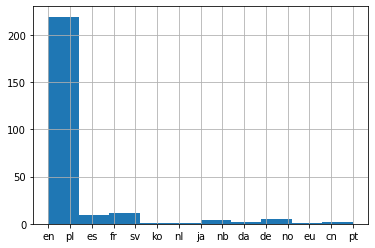

In [32]:
pdf_movies_3["original_language"].hist()

In [101]:
min_pass_len=16
max_pass_len = 24
speclchar_num_len = 5
pdf_movies_2['new_titles'] = pdf_movies_2["original_title"].str.replace(" ", "")
pdf_movies_2['new_titles'] = pdf_movies_2["original_title"].str.replace(":", "")
pdf_movies_2['title_len'] = pdf_movies_2["new_titles"].str.len()
pdf_movies_4 = pdf_movies_2[(pdf_movies_2['title_len'].between(min_pass_len-speclchar_num_len, max_pass_len-speclchar_num_len)) &
                            (pdf_movies_2["new_titles"].str.contains('[A-Za-z]', na=False))
                            & (pdf_movies_2["original_language"]=="en")]
                            #  & (pdf_movies_2["original_title"].str.isalpha() == True)]
pdf_movies_4.dropna(inplace=True) 
pdf_movies_4.describe(include="all")
titles = pdf_movies_4["new_titles"].values

<ipython-input-101-5219f637318e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_movies_2['new_titles'] = pdf_movies_2["original_title"].str.replace(" ", "")
<ipython-input-101-5219f637318e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_movies_2['new_titles'] = pdf_movies_2["original_title"].str.replace(":", "")
<ipython-input-101-5219f637318e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,id,original_language,original_title,popularity,vote_average,title_len,new_titles
count,3318.000000,3318,3318,3318.000000,3318.000000,3318.000000,3318
unique,NaN,1,3244,NaN,NaN,NaN,3244
top,NaN,en,A Christmas Carol,NaN,NaN,NaN,A Christmas Carol
freq,NaN,3318,4,NaN,NaN,NaN,4
mean,212120.169681,NaN,NaN,32.244095,6.288457,14.485835,NaN
std,246441.251467,NaN,NaN,78.549664,1.225944,2.503590,NaN
min,12.000000,NaN,NaN,6.325000,0.000000,11.000000,NaN
25%,10482.750000,NaN,NaN,11.747000,5.800000,12.000000,NaN
50%,64688.500000,NaN,NaN,17.482500,6.400000,14.000000,NaN
75%,409029.500000,NaN,NaN,28.232750,7.000000,17.000000,NaN


In [95]:
pdf_movies_4

,id,original_language,original_title,popularity,vote_average,title_len,new_titles
3,796499.0,en,Army of Thieves,2552.437,6.9,13.0,ArmyofThieves
5,574060.0,en,Gunpowder Milkshake,1453.423,6.5,18.0,GunpowderMilkshake
7,610253.0,en,Halloween Kills,1023.024,7.0,14.0,HalloweenKills
9,768449.0,en,American Badger,1148.822,6.3,14.0,AmericanBadger
10,639721.0,en,The Addams Family 2,1031.821,7.4,16.0,TheAddamsFamily2
...,...,...,...,...,...,...,...
10000,293310.0,en,Citizenfour,7.023,7.8,11.0,Citizenfour
10005,5764.0,en,Princess of Thieves,7.517,6.2,17.0,PrincessofThieves
10009,530.0,en,A Grand Day Out,9.266,7.5,12.0,AGrandDayOut
10011,162215.0,en,How I Live Now,9.520,6.6,11.0,HowILiveNow


In [34]:
speclchar_num_map = {
    0:"~",
    1:"!",
    2:"@",
    3:"#",
    4:"$",
    5:"%",
    6:"^",
    7:"&",
    8:"*",
    9:"(",
    10:")",
    11:"_",
    12:"+"
}
speclchar_num_map

'$'

In [108]:
# get random lengths of special and numerical characters 
specl_chars_len = np.random.randint(1,speclchar_num_len)
num_len = speclchar_num_len - specl_chars_len

# get the random starting indexes of special and numerical characters 
num_start = np.random.randint(1,9-num_len+1)
spclchar_start = np.random.randint(0,list(speclchar_num_map.keys())[-1]-specl_chars_len+1)

# create the special and numerical characters 
spcl_num_chars = ""
for _ in range(specl_chars_len):
    spcl_num_chars += str(speclchar_num_map[spclchar_start])
    spclchar_start+=1
for _ in range(num_len):
    spcl_num_chars += str(num_start)
    num_start+=1

(specl_chars_len, num_len), spclchar_start, num_start, spcl_num_chars
# ((3, 2), 12, 4, '()_23')
# ((3, 2), 8, 5, '%^&34')
title = np.random.choice(titles,replace=True)
password = title + spcl_num_chars
password

'BehindtheCurve*()67'

In [139]:
import pandas as pd
import numpy as np
import os
import pickle

In [164]:
class PasswordGenerator:
    def __init__(self, min_pass_len):
        self.min_pass_len=min_pass_len
        # min_pass_len=16
        self.max_pass_len = self.min_pass_len + 6 #22
        self.speclchar_num_len = 5
        self.movie_data_path = './artifacts/Top_10000_Movies_2.csv'
        self.list_titles_path = './artifacts/list_titles.pkl'

        self.speclchar_num_map = {
        0:"~",
        1:"!",
        2:"@",
        3:"#",
        4:"$",
        5:"%",
        6:"^",
        7:"&",
        8:"*",
        9:"(",
        10:")",
        11:"_",
        12:"+",
        13:"<",
        14:">",
        15:"?",
        16:"{",
        17:"}",
        18:"|"
    }
    
    def read_movie_dataset(self):
        pdf_movies = pd.read_csv(self.movie_data_path)
        # select particular columns
        pdf_movies_processed = pdf_movies[["id","original_language","original_title","popularity","vote_average"]]
        

        pdf_movies_processed.loc[:,'new_titles'] = pdf_movies_processed["original_title"].str.replace(" ", "")
        pdf_movies_processed.loc[:,'new_titles'] = pdf_movies_processed["new_titles"].str.replace(":", "")
        pdf_movies_processed.loc[:,'new_title_len'] = pdf_movies_processed["new_titles"].str.len()
        pdf_movies_processed = (
            pdf_movies_processed[(pdf_movies_processed['new_title_len']
                                .between(self.min_pass_len - self.speclchar_num_len,
                                        self.max_pass_len - self.speclchar_num_len))
                                & (pdf_movies_processed["new_titles"].str.contains('[A-Za-z]', na=False))
                                & (pdf_movies_processed["original_language"]=="en")])
                         #  & (pdf_movies_2["original_title"].str.isalpha() == True)]
        pdf_movies_processed.dropna(inplace=True) 
        titles = pdf_movies_processed["new_titles"].values
        with open(self.list_titles_path, 'wb') as f:
            pickle.dump(titles, f)
        return titles
    
    def read_titles(self):
        try:
            with open(self.list_titles_path, 'rb') as f:
                self.titles = pickle.load(f)
        except FileNotFoundError as e:
            self.titles = self.read_movie_dataset()
        # return self.titles
        
    def generate(self):
        
        # get random lengths of special and numerical characters 
        self.specl_chars_len = np.random.randint(1,self.speclchar_num_len)
        self.num_len = self.speclchar_num_len - self.specl_chars_len

        # get the random starting indexes of special and numerical characters 
        num_start = np.random.randint(1, 9- self.num_len + 1)
        spclchar_start = np.random.randint(0, list(self.speclchar_num_map.keys())[-1] - self.specl_chars_len + 1)

        # create the special and numerical characters 
        spcl_num_chars = ""
        for _ in range(self.specl_chars_len):
            spcl_num_chars += str(self.speclchar_num_map[spclchar_start])
            spclchar_start+=1
        for _ in range(self.num_len):
            spcl_num_chars += str(num_start)
            num_start+=1

        print((specl_chars_len, num_len), spclchar_start, num_start, spcl_num_chars)
        
        rand_title = np.random.choice(self.titles, replace=True)
        password = rand_title + spcl_num_chars
        return password

In [165]:
pg = PasswordGenerator(16)
# titles = pg.read_movie_dataset()
pg.read_titles()
password = pg.generate()

(3, 2) 9 7 *3456


In [166]:
password

'LadyMacbeth*3456'

In [1]:
from password_generator import PasswordGenerator

In [2]:
pg = PasswordGenerator(16)
# titles = pg.read_movie_dataset()
pg.read_titles()
password = pg.generate()
password

(2, 3) 9 5 &*234


'TheWrongMissy&*234'

In [10]:
password = pg.generate()
password

(4, 1) 14 9 )_+<8


'SomeoneGreat)_+<8'